<a href="https://colab.research.google.com/github/Kaveya2208/Kaveya2208/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv('/content/drive/MyDrive/project/fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [26]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [27]:
df.dropna(inplace=True)

In [28]:
df['length'] = df['text_'].apply(len)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


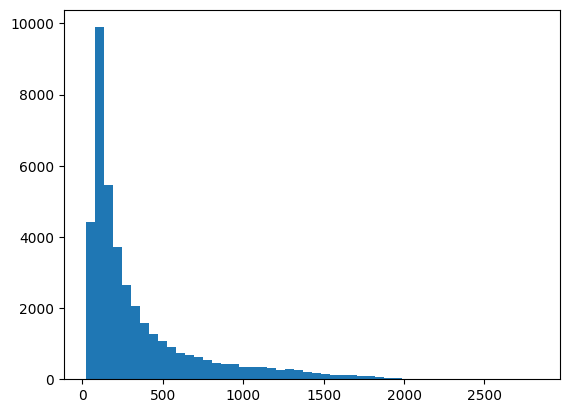

In [30]:
plt.hist(df['length'],bins=50)
plt.show()

In [31]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     305.573506  307.037430  24.0   96.0  174.0  383.0  1717.0  
OR     396.970419  418.428047  28.0  121.0  224.0  498.0  2827.0

In [32]:
df.length.describe()

count    40432.000000
mean       351.271963
std        369.813570
min         24.000000
25%        107.000000
50%        198.000000
75%        439.000000
max       2827.000000
Name: length, dtype: float64

In [33]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7c1ed01bd5a0>)

In [36]:
import nltk
nltk.download('stopwords')
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Total Vocabulary: 61612


In [37]:
review4 = df['text_'][3]
review4

'Missing information on how to use it, but it is a great product for the price!  I'

In [38]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 15403)	1
  (0, 38385)	1
  (0, 41023)	1
  (0, 49181)	1
  (0, 49370)	1
  (0, 59397)	1
(1, 61612)


In [40]:
bow_reviews = bow_transformer.transform(df['text_'])

In [41]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40432, 61612)
Amount of non zero values in the bag of words model: 1071779


In [42]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.04


In [43]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 15403)	1
  (0, 38385)	1
  (0, 41023)	1
  (0, 49181)	1
  (0, 49370)	1
  (0, 59397)	1


In [44]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.914254381647021
2.9117275133827123


In [45]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40432, 61612)
No. of Dimensions: 2


In [46]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [47]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [48]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c1ed01bd5a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [49]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'CG', 'OR', ..., 'CG', 'OR', 'OR'], dtype='<U2')

In [51]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.92      0.87      7057
          OR       0.91      0.80      0.85      7095

    accuracy                           0.86     14152
   macro avg       0.87      0.86      0.86     14152
weighted avg       0.87      0.86      0.86     14152

Confusion Matrix: [[6496  561]
 [1393 5702]]
Accuracy Score: 0.8619276427360091


In [52]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 86.19%


In [53]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [54]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c1ed01bd5a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [56]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'CG', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [57]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.92      0.86      7057
          OR       0.91      0.79      0.85      7095

    accuracy                           0.86     14152
   macro avg       0.86      0.86      0.85     14152
weighted avg       0.86      0.86      0.85     14152

Confusion Matrix: [[6472  585]
 [1467 5628]]
Accuracy Score: 0.8550028264556246
Model Prediction Accuracy: 85.5%


In [58]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [59]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c1ed01bd5a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [60]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'CG', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [61]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.75      0.78      0.77      7057
          OR       0.77      0.74      0.76      7095

    accuracy                           0.76     14152
   macro avg       0.76      0.76      0.76     14152
weighted avg       0.76      0.76      0.76     14152

Confusion Matrix: [[5501 1556]
 [1812 5283]]
Accuracy Score: 0.7620124364047485
Model Prediction Accuracy: 76.2%


In [62]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [63]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c1ed01bd5a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [64]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'CG', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [65]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.86      0.88      7057
          OR       0.87      0.91      0.89      7095

    accuracy                           0.88     14152
   macro avg       0.88      0.88      0.88     14152
weighted avg       0.88      0.88      0.88     14152

Confusion Matrix: [[6066  991]
 [ 659 6436]]
Accuracy Score: 0.883408705483324
Model Prediction Accuracy: 88.34%


In [70]:
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')


Logistic Regression Prediction Accuracy: 88.34%
Decision Tree Classifier Prediction Accuracy: 76.2%
Random Forests Classifier Prediction Accuracy: 85.5%
Multinomial Naive Bayes Prediction Accuracy: 86.19%
